In [1]:
%pylab inline
import emcee
import corner

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lnprior(theta):
    D,W,b = theta
    if (D<2e-6) or (D>0.2): return -np.inf
    if (b<0) or (b>1): return -np.inf
    if (W<0.001): return -np.inf 
    k = np.sqrt(D)
    aR = np.sqrt((1+k)**2 - b**2)/(np.pi*W)
    if (aR < 2): return -np.inf
    return -np.log(k*W) - np.log(k) - np.log(aR)

In [3]:
nwalkers = 200
ndim = 3
p0 = 0.05 + 0.01*np.random.rand(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprior)
state = sampler.run_mcmc(p0, 10000, skip_initial_state_check=True)

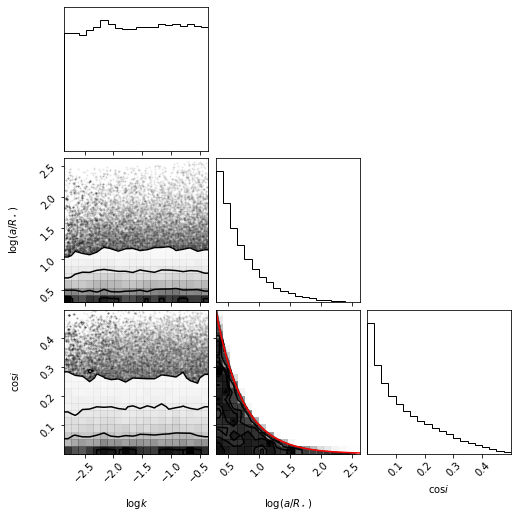

In [4]:
flat_samples = sampler.get_chain(discard=5000, thin=10, flat=True)
D = flat_samples[:,0]
W = flat_samples[:,1]
b = flat_samples[:,2]
k = np.sqrt(D)
aR = np.sqrt((1+k)**2 - b**2)/(np.pi*W)
cosi = b/aR
logaR = np.log10(aR)
logk = np.log10(k)
p = np.array([logk,logaR,cosi]).T
labels=['$\log k$','$\log(a/R_\star)$','$\cos i$']
figure = corner.corner(p, labels=labels) 
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))
x = linspace(min(logaR),max(logaR))
y = 1/10**x
axes[2][1].plot(x,y,c='r');

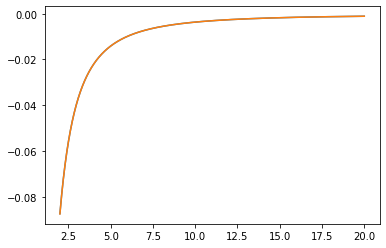

In [5]:
aR = linspace(2,20,10001)
k = 0.09783
cosi = 0.0342
W = sqrt((1+k)**2-aR**2*cosi**2)/(np.pi*aR)
dWdaR = -(1+k)**2/(W*np.pi**2*aR**3)
plot(aR,np.gradient(W,aR))
plot(aR,dWdaR)

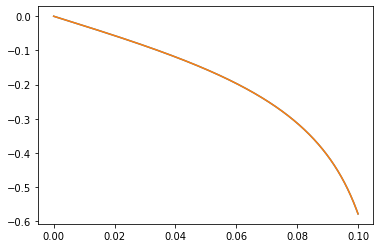

In [6]:
cosi = linspace(0,0.1,10001)
k = 0.0943
aR = 9.587
b = aR*cosi
W = sqrt((1+k)**2-b**2)/(np.pi*aR)
dWdcosi = -aR**2*cosi/(W*np.pi**2*aR**2)
plot(cosi,np.gradient(W,cosi))
plot(cosi,dWdcosi)